<img src = ""></img>

<center><h1>Attrition rate prediction in an organization</h1></center>
<img src='Images/attrition.jpg' style="height:450px; width:700px"/>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("dark")

In [40]:
df = pd.read_csv('../Data/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [42]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<h4>Employee satisfaction vs employee attrition. Lower the satisfaction level higher chances of employee leaving</h4>

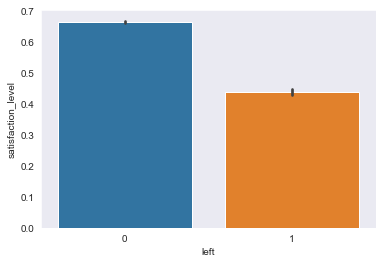

In [43]:
sns.barplot(x="left", y= "satisfaction_level", data=df)
plt.show()

<h4>Effect of last performance evaluation on employee attrition</h4>

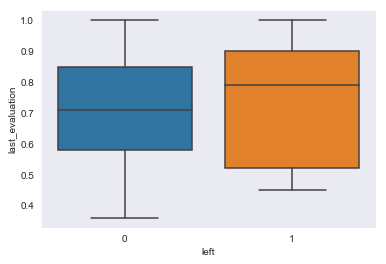

In [44]:
sns.boxplot(x="left", y= "last_evaluation", data=df)
plt.show()

<h4>Do employees spending more hours tends to leave organization?</h4>

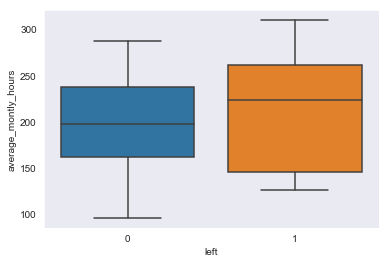

In [45]:
sns.boxplot(x="left", y= "average_montly_hours", data=df)
plt.show()

<h4>Does years spent in the organization influence employees to leave?</h4>

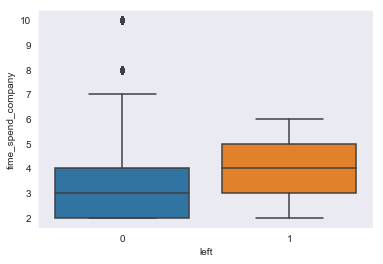

In [46]:
sns.boxplot(x="left", y="time_spend_company", data=df)
plt.show()

<h4>Do number of projects changes cause attrition? Seems employees who worked on between 3 to 4 projects stayed on than people with very less changes or very high changes</h4>

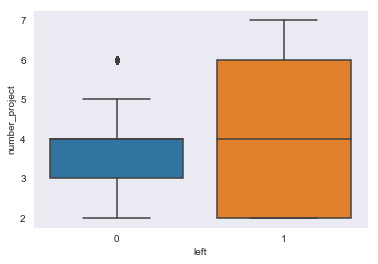

In [47]:
sns.boxplot(x="left", y="number_project", data=df)
plt.show()

In [48]:
#Convert salary into numerical type by Dummification
df = pd.get_dummies(df, columns=['salary'], drop_first=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0


In [49]:
#Split the data set into train and test
y = df["left"]
#drop department & left
columns = ['Department', 'left']
df = df.drop(columns, axis=1)
col = df.columns
x = df[col]
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0


### Build model and import logistic regression

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Split the data intorain and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,  random_state = 1)

In [51]:
x_train.shape

(11999, 9)

In [52]:
x_test.shape

(3000, 9)

In [53]:
y_train.shape

(11999,)

In [54]:
y_test.shape

(3000,)

### Train the data

In [55]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

e:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predict the test data

In [56]:
pred = logisticRegr.predict(x_test)
pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Model Evaluation using accuracy classification score

In [57]:
from sklearn import metrics
ac = metrics.accuracy_score(y_test, pred)
print('Accuracy score for test data is:', ac)

Accuracy score for test data is: 0.7886666666666666


### Model Evaluation using confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, pred))
print(confusion_matrix)

      0    1
0  2107  180
1   454  259


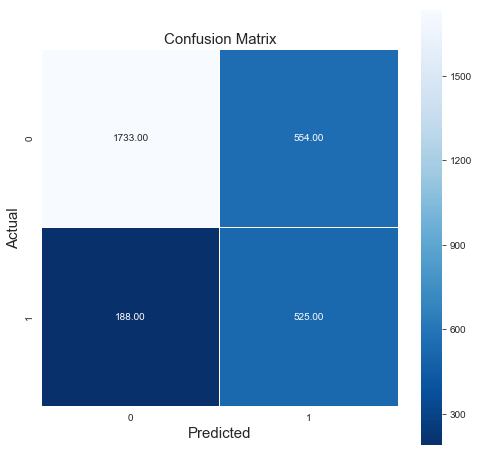

In [37]:
def plot_confusion_matrix(df_confusion):
    plt.figure(figsize=(8,8))
    sns.heatmap(df_confusion, linewidth=.2, fmt='.2f', annot=True, square = True, cmap = 'Blues_r')
    plt.title('Confusion Matrix',size = 15)
    plt.ylabel('Actual', fontsize = 15)
    plt.xlabel('Predicted', fontsize = 15)
    
plot_confusion_matrix(confusion_matrix)

### Check the score via logisticRegr.score()

In [59]:
score = logisticRegr.score(x_test, y_test)
score

0.7886666666666666

Setting the threshold to __0.75__

In [60]:
pred = np.where(logisticRegr.predict_proba(x_test)[:,1] >= .75, 1, 0)
ac = metrics.accuracy_score(y_test, pred)
print('Accuracy score fo test data is:', ac)

Accuracy score fo test data is: 0.7573333333333333


The accuracy has been __reduced__ from __0.78 to 0.75__. Hence, 0.75 is __not a good threshold__ for our model. 

Setting the threshold to __0.25__

In [61]:
pred = np.where(logisticRegr.predict_proba(x_test)[:,1] >= .25, 1, 0)
ac = metrics.accuracy_score(y_test, pred)
print('Accuracy score fo test data is:', ac)

Accuracy score fo test data is: 0.7526666666666667


The accuracy has been __reduced__ from __0.78 to 0.75__. Hence, 0.25 is also __not a good threshold__ for our model. 